In [1]:
%pwd

'c:\\Users\\User\\Documents\\EndToEndMLProjects\\End-To-End-Machine-Learning-Project-with-MlFlow\\research'

In [2]:
import os

os.chdir('../')
%pwd

'c:\\Users\\User\\Documents\\EndToEndMLProjects\\End-To-End-Machine-Learning-Project-with-MlFlow'

In [3]:
import pandas as pd

loan_df = pd.read_csv('artifacts/data_ingestion/Loan_Default.csv')
loan_df_copy = loan_df.copy()


In [4]:
loan_df['Credit_Score'].dtype

dtype('int64')

In [5]:
for col in loan_df.columns:
    print(f'{col}: {loan_df[col].dtype}')

ID: int64
year: int64
loan_limit: object
Gender: object
approv_in_adv: object
loan_type: object
loan_purpose: object
Credit_Worthiness: object
open_credit: object
business_or_commercial: object
loan_amount: int64
rate_of_interest: float64
Interest_rate_spread: float64
Upfront_charges: float64
term: float64
Neg_ammortization: object
interest_only: object
lump_sum_payment: object
property_value: float64
construction_type: object
occupancy_type: object
Secured_by: object
total_units: object
income: float64
credit_type: object
Credit_Score: int64
co-applicant_credit_type: object
age: object
submission_of_application: object
LTV: float64
Region: object
Security_Type: object
Status: int64
dtir1: float64


In [6]:
pd.set_option("display.max_columns", None) 

loan_df.head(3)

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  \
0           p1                l1        nopc                  nob/c   
1           p1                l1        nopc                    b/c   
2           p1                l1        nopc                  nob/c   

   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500               NaN                   NaN              NaN   
1       206500               NaN                   NaN              NaN   
2       406500              4.56                   0.2            595.0   

    term Neg_ammortization interest_only lump_sum_payment  property_value  \
0  360.0           not_neg       not_int         not_lpsm        118000.0   
1  360.0           not_neg       not_int             lpsm             NaN   
2  360.0           neg_amm       not_int         not_lpsm        508000.0   

  construction_type occupancy_type Secured_by total_units  income credit_type  \
0                sb             pr       home          1U  1740.0         EXP   
1                sb             pr       home          1U  4980.0        EQUI   
2                sb             pr       home          1U  9480.0         EXP   

   Credit_Score co-applicant_credit_type    age submission_of_application  \
0           758                      CIB  25-34                   to_inst   
1           552                      EXP  55-64                   to_inst   
2           834                      CIB  35-44                   to_inst   

         LTV Region Security_Type  Status  dtir1  
0  98.728814  south        direct       1   45.0  
1        NaN  North        direct       1    NaN  
2  80.019685  south        direct       0   46.0

In [7]:
loan_df.shape

(148670, 34)

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Remove Duplicates

In [9]:
loan_df.duplicated().any()

np.False_

In [10]:
# len(loan_df[loan_df.duplicated()])

# Checking for Duplicate Rows:
if loan_df.duplicated().any():
    print("Dupicate rows exist")
else:
    print("No Dupicate rows exist")

No Dupicate rows exist


### Null Values

In [11]:
loan_df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [12]:
import numpy as np
from mlproject.utils.common import get_missing_columns

# Filter columns with missing values
numeric_columns_with_na, category_columns_with_na, numeric_columns_missing_data_info, category_columns_missing_data_info = get_missing_columns(loan_df)

print("Numeric Columns.\n")
print("Columns with Missing Values:", numeric_columns_with_na)
print("\nMissing Data Info:")
for col, info in numeric_columns_missing_data_info.items():
    print(f"{col}: {info}\n")


print("\nCategorical Columns.\n")
print("Columns with Missing Values:", category_columns_with_na)
print("\nMissing Data Info:")
for col, info in category_columns_missing_data_info.items():
    print(f"{col}: {info}\n")

Numeric Columns.

Columns with Missing Values: ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']

Missing Data Info:
rate_of_interest: 24.51% missing values

Interest_rate_spread: 24.645% missing values

Upfront_charges: 26.664% missing values

term: 0.028% missing values

property_value: 10.155% missing values

income: 6.155% missing values

LTV: 10.155% missing values

dtir1: 16.225% missing values


Categorical Columns.

Columns with Missing Values: ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']

Missing Data Info:
loan_limit: 2.249% missing values

approv_in_adv: 0.611% missing values

loan_purpose: 0.09% missing values

Neg_ammortization: 0.081% missing values

age: 0.135% missing values

submission_of_application: 0.135% missing values



* # If missing value % is less than 5% we can drop rows having missing values


In [13]:
a = category_columns_with_na + numeric_columns_with_na
a

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [14]:
numeric_columns_with_na

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [15]:
columns_with_na = category_columns_with_na + numeric_columns_with_na

columns_having_rows_to_drop = []
for column in columns_with_na:
    missing_percentage = loan_df[column].isnull().mean() * 100
    # Debugging
    # print(f"Columns with ≤5% missing values: {missing_percentage}")
    
    if missing_percentage <= 5:
        columns_having_rows_to_drop.append(column)
        
columns_having_rows_to_drop

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application',
 'term']

In [16]:
numeric_columns_with_na, category_columns_with_na, numeric_columns_missing_data_info, category_columns_missing_data_info = get_missing_columns(loan_df)

print("Numeric Columns.\n")
print("Columns with Missing Values:", numeric_columns_with_na)
print("\nMissing Data Info:")
for col, info in numeric_columns_missing_data_info.items():
    print(f"{col}: {info}\n")


print("\nCategorical Columns.\n")
print("Columns with Missing Values:", category_columns_with_na)
print("\nMissing Data Info:")
for col, info in category_columns_missing_data_info.items():
    print(f"{col}: {info}\n")

Numeric Columns.

Columns with Missing Values: ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']

Missing Data Info:
rate_of_interest: 24.51% missing values

Interest_rate_spread: 24.645% missing values

Upfront_charges: 26.664% missing values

term: 0.028% missing values

property_value: 10.155% missing values

income: 6.155% missing values

LTV: 10.155% missing values

dtir1: 16.225% missing values


Categorical Columns.

Columns with Missing Values: ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']

Missing Data Info:
loan_limit: 2.249% missing values

approv_in_adv: 0.611% missing values

loan_purpose: 0.09% missing values

Neg_ammortization: 0.081% missing values

age: 0.135% missing values

submission_of_application: 0.135% missing values



In [17]:
loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

#### 1) income column

In [18]:
# Group by 'age' and fill missing values in 'income' with median
loan_df['income_median'] = loan_df.groupby('age')['income'].transform(lambda x: x.fillna(x.median()))
loan_df['income_mean'] = loan_df.groupby('age')['income'].transform(lambda x: x.fillna(x.mean()))


#### 2) dtir

In [19]:
# Group by 'loan_type' and fill missing values in 'dtir1' with median
loan_df['dtir1_median'] = loan_df.groupby('loan_type')['dtir1'].transform(lambda x: x.fillna(x.median()))
loan_df['dtir1_mean'] = loan_df.groupby('loan_type')['dtir1'].transform(lambda x: x.fillna(x.mean()))


In [20]:
import matplotlib.pyplot as plt



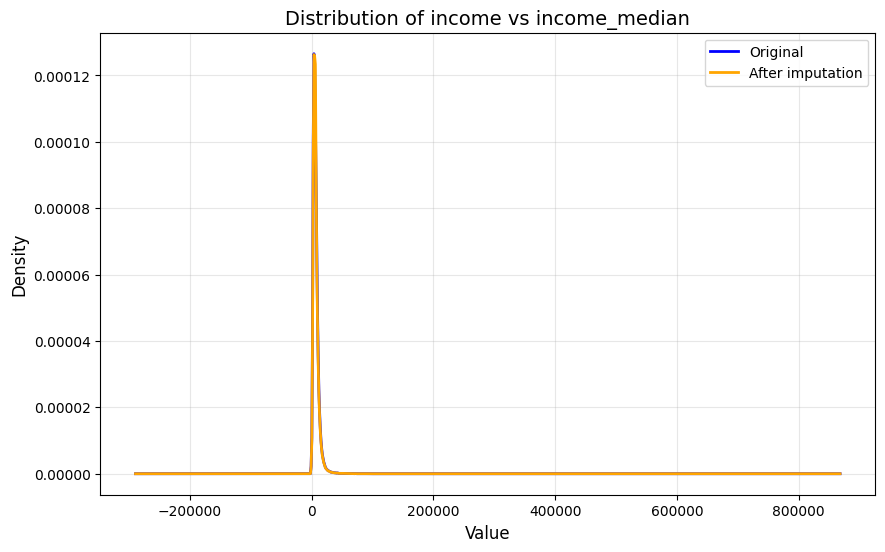

In [21]:
from mlproject.utils.common import before_after_distribution

# Check the distribution before and after imputation for 'income'
before_after_distribution(loan_df, 'income', 'income_median')

In [22]:
# Keep: income_median

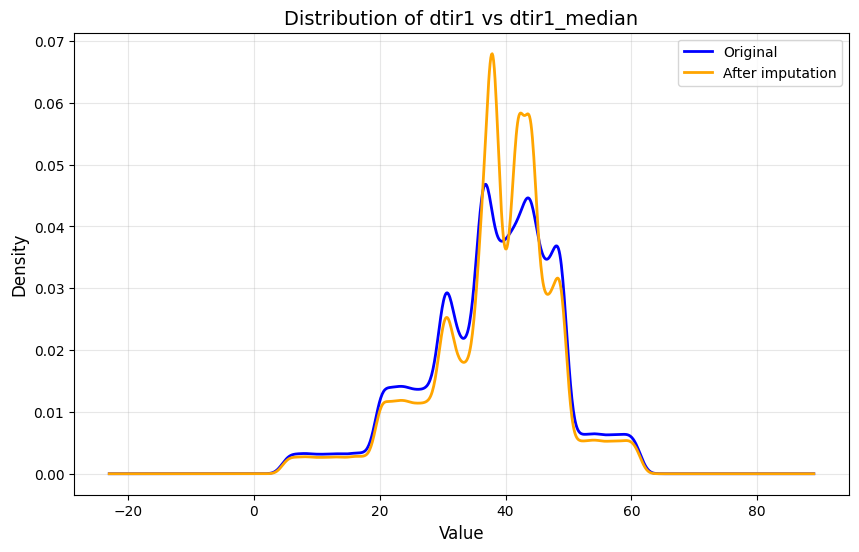

In [23]:
# Check the distribution before and after imputation for 'income'
before_after_distribution(loan_df, 'dtir1', 'dtir1_median')

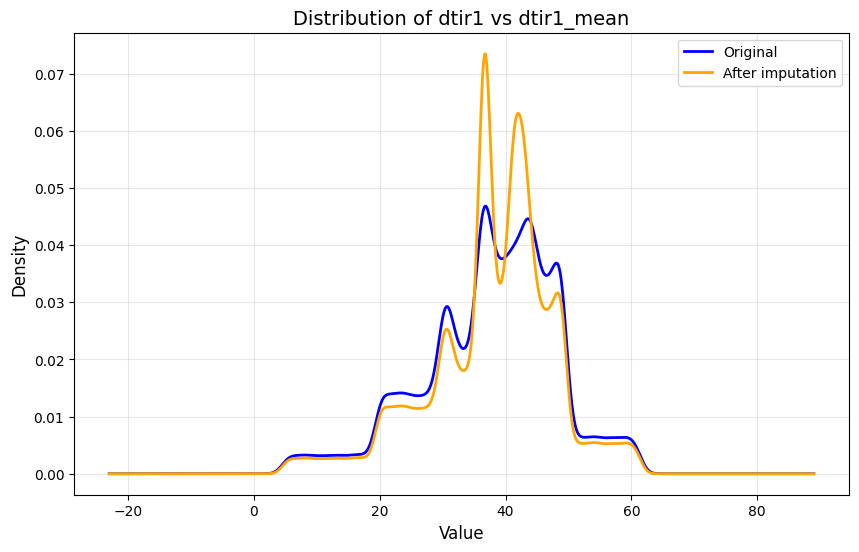

In [24]:
before_after_distribution(loan_df, 'dtir1', 'dtir1_mean')

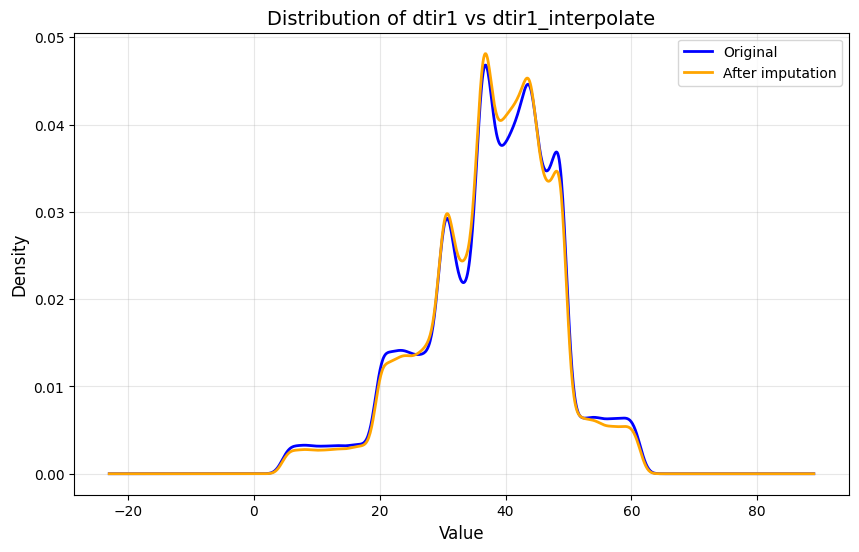

In [25]:
# # Linear interpolate estimates missing values by drawing a straight lkine btw two neighboring
# data points, and fill missing values with the values along that line.
# Interpolation works well for columns with sequential data (e.g., time series).


loan_df['dtir1_interpolate'] = loan_df['dtir1'].interpolate(method='linear')

before_after_distribution(loan_df, 'dtir1', 'dtir1_interpolate')

In [26]:
# Keep: dtir1_interpolate

In [27]:
columns_to_drop01 = ['income', 'income_mean', 'dtir1', 'dtir1_mean', 'dtir1_median']
columns_to_drop01

['income', 'income_mean', 'dtir1', 'dtir1_mean', 'dtir1_median']

#### 3) property_value

In [28]:
numeric_columns_with_na

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']


* If sequential, use ffill()
* Likely skewed or related to interest rate; median avoids distortion.

In [29]:
from mlproject.utils.common import plot_histogram

plot_histogram(df=loan_df, column_name='property_value')


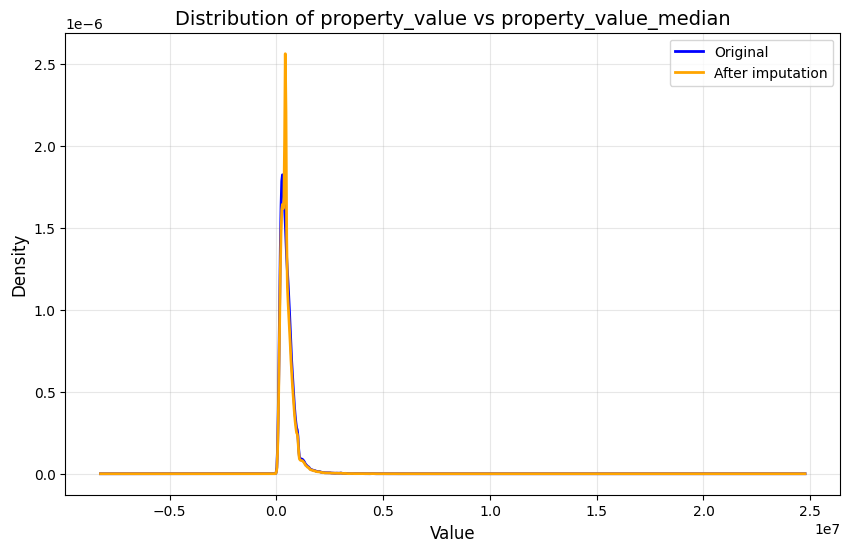

In [30]:
# Group by categories like Region or property_type for better imputation accuracy.

loan_df['property_value_median'] = loan_df.groupby('Region')['property_value'].transform(lambda x: x.fillna(x.median()))
before_after_distribution(loan_df, 'property_value', 'property_value_median')


In [31]:
plot_histogram(df=loan_df, column_name='rate_of_interest')

In [32]:
plot_histogram(df=loan_df, column_name='Interest_rate_spread')

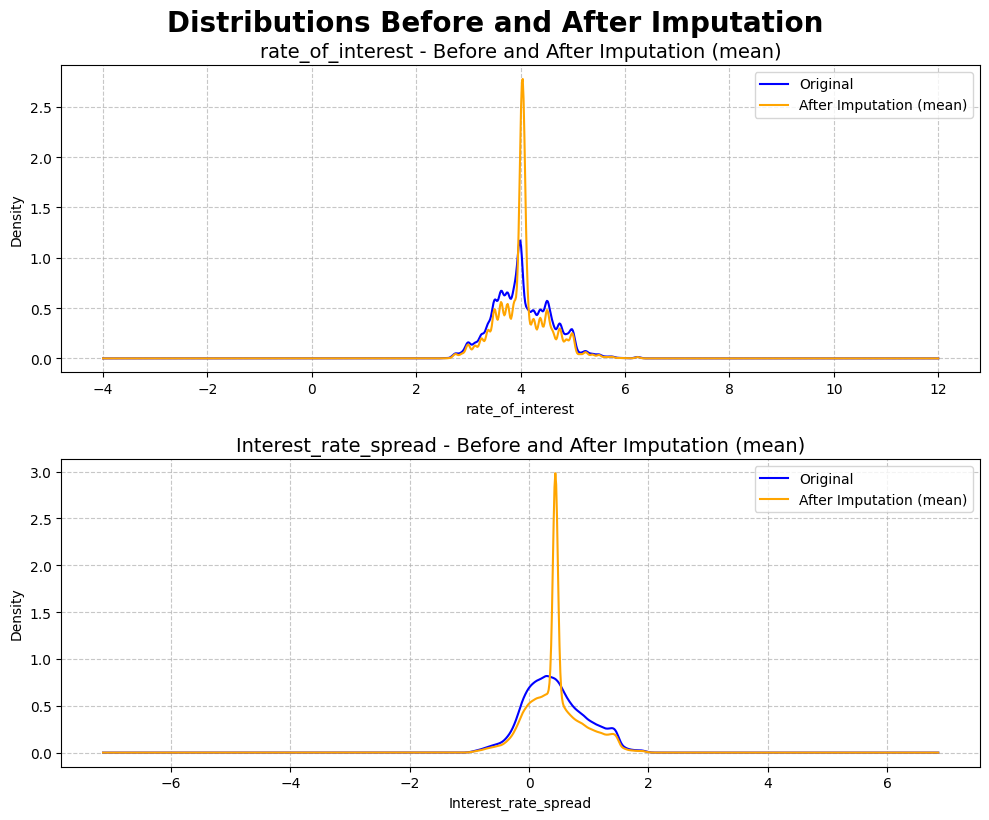

In [33]:
from mlproject.utils.common import univariate_numeric_imputation

univariate_numeric_imputation(loan_df, numeric_columns=['rate_of_interest', 'Interest_rate_spread'])

In [34]:
# plot_histogram(df=loan_df, column_name='Upfront_charges')

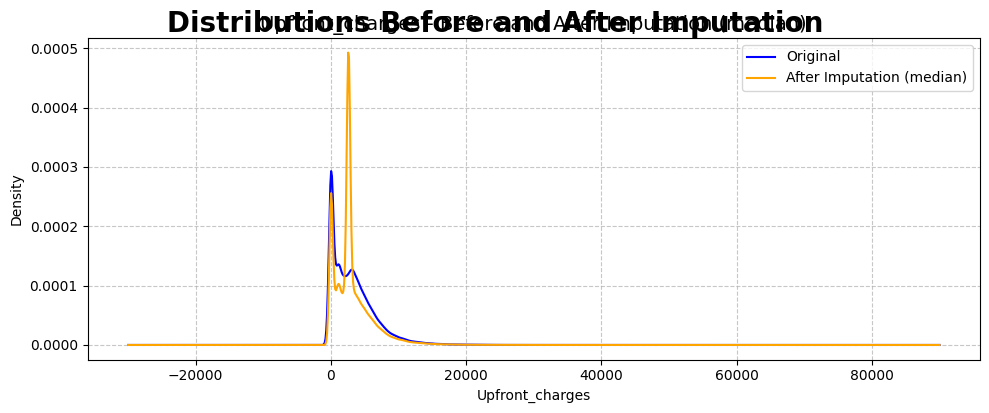

In [35]:
univariate_numeric_imputation(loan_df, numeric_columns=['Upfront_charges'], method='median')

#### 4) LTV

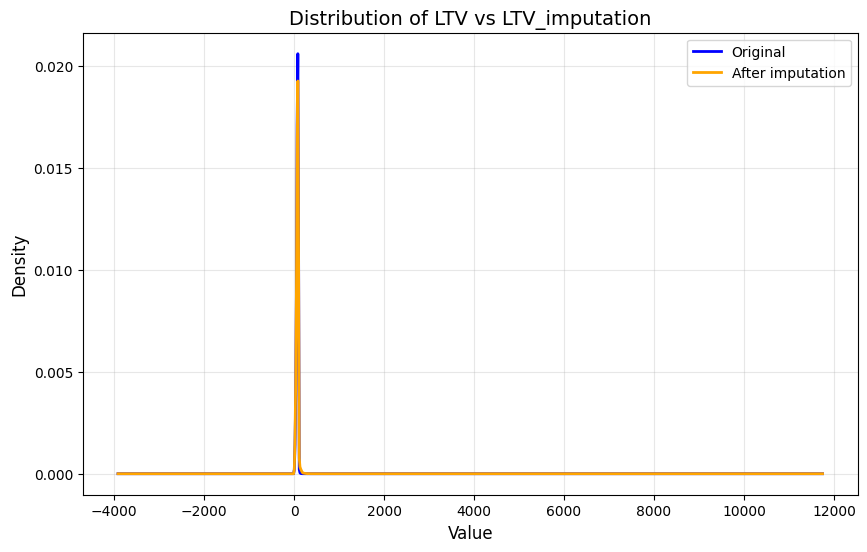

In [36]:
# LTV is the ratio of loan to property value in percentages
loan_df['LTV_imputation'] = loan_df['LTV'].fillna((loan_df['loan_amount'] / loan_df['property_value_median']) * 100)

before_after_distribution(loan_df, 'LTV', 'LTV_imputation')

#### Dropping Unneeded Columns

In [37]:
columns_to_drop02 = [
    'rate_of_interest',
    'Interest_rate_spread',
    'Upfront_charges',
    'property_value', 'LTV'
]

# Combine other columns to drop (if any)
total_columns_to_drop = columns_to_drop01 + columns_to_drop02

# Drop rows with missing values in these columns
loan_df.dropna(subset=columns_having_rows_to_drop, axis=0, inplace=True)

# Drop specified columns
loan_df.drop(labels=total_columns_to_drop, axis=1, inplace=True)

numeric_columns_with_na, category_columns_with_na, numeric_columns_missing_data_info, category_columns_missing_data_info = get_missing_columns(loan_df)

print("Numeric Columns.\n")
print("Columns with Missing Values:", numeric_columns_with_na)

print("\nCategorical Columns.\n")
print("Columns with Missing Values:", category_columns_with_na)

Numeric Columns.

Columns with Missing Values: []

Categorical Columns.

Columns with Missing Values: []


In [38]:
loan_df.columns = loan_df.columns.str.replace('_median', '')
loan_df.columns = loan_df.columns.str.replace('_mean_imputed', '')
loan_df.columns = loan_df.columns.str.replace('_median_imputed', '')
loan_df.columns = loan_df.columns.str.replace('_imputation', '')
loan_df.columns = loan_df.columns.str.replace('_interpolate', '')
loan_df.columns = loan_df.columns.str.replace('_imputed', '')

loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status',
       'income', 'dtir1', 'property_value', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'LTV'],
      dtype='object')

# Correct Data Types

In [39]:
loan_df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
Region                        object
Security_Type                 object
Status                         int64
i

In [40]:
# `term` column is showing months so making it integer
loan_df['term'] = loan_df['term'].astype('int')

loan_df['Status'] = loan_df['Status'].astype('object')

# Normalize Values¶

* Standardize or normalize inconsistent categorical values (replace).



In [41]:
for col in loan_df.select_dtypes(include='object').columns:
    print(f"Unique values in {col} column are :{loan_df[col].unique().tolist()}\n")

Unique values in loan_limit column are :['cf', 'ncf']

Unique values in Gender column are :['Sex Not Available', 'Male', 'Joint', 'Female']

Unique values in approv_in_adv column are :['nopre', 'pre']

Unique values in loan_type column are :['type1', 'type2', 'type3']

Unique values in loan_purpose column are :['p1', 'p4', 'p3', 'p2']

Unique values in Credit_Worthiness column are :['l1', 'l2']

Unique values in open_credit column are :['nopc', 'opc']

Unique values in business_or_commercial column are :['nob/c', 'b/c']

Unique values in Neg_ammortization column are :['not_neg', 'neg_amm']

Unique values in interest_only column are :['not_int', 'int_only']

Unique values in lump_sum_payment column are :['not_lpsm', 'lpsm']

Unique values in construction_type column are :['sb', 'mh']

Unique values in occupancy_type column are :['pr', 'sr', 'ir']

Unique values in Secured_by column are :['home', 'land']

Unique values in total_units column are :['1U', '2U', '3U', '4U']

Unique values in

* All categories are valid except there is a typo in Security_Type column. Indirect is written as Indriect and changing values in `occupancy_type` column.

In [42]:
loan_df['Security_Type'] = loan_df['Security_Type'].replace({'Indriect':'Indirect'}) 

In [43]:
loan_df['occupancy_type'] = loan_df['occupancy_type'].replace({'pr':'Primary Residential', 'sr':'Secondary Residdential', 'ir':'Investment Residential'}) 

In [44]:
import numpy as np
import pandas as pd



* **To check numeric columns with outiers**

In [45]:
from mlproject.utils.common import plot_univariate_distribution_num_features

numeric_columns = loan_df.select_dtypes(include=['int64', 'float64']).columns

# plot_univariate_distribution_num_features(loan_df, numeric_columns)

In [46]:
loan_df['Status'].unique()

array([1, 0], dtype=object)

* `X_resampled` and `y_resampled` now contain the balanced training data.

* The test data (`X_test`, `y_test`) remains untouched and imbalanced.

# Univariate Outlier detection¶


In [47]:
from mlproject.utils.common import get_outliers

numeric_columns_with_outliers = ['loan_amount', 'income', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest', 'property_value', 'dtir1', 'LTV']

for col in numeric_columns_with_outliers:
    outliers = get_outliers(loan_df, col)
    loan_df.drop(loan_df[outliers].index, inplace=True)

In [48]:
# plot_histogram(loan_df, 'term')

In [49]:
loan_df['year'].nunique()

1

# Univariate Analysis ¶
 

In [50]:
# Categorical distr
from mlproject.utils.common import plot_univariate_distribution_categorical_features

categorical_features = loan_df.select_dtypes(include=['object']).columns
# plot_univariate_distribution_categorical_features(loan_df, categorical_features)

1) `approv_in_adv`: Loan Approved in advance vs not
* Key Insight: The majority of loans were not pre-approved. Not pre-approved = 81184, Approved = 15731.

2) `open_credit`: nopc = 96885, pc = 30
* key Insight:

3) `business_or_commercial`: "nob/c" (not business or commercial) = 96885, "b/c" (business or commercial) = 14556
* Key Insight: The majority of loan recipients are not classified under the business or commercial category.

4) `loan_type`: 


5) `Neg_ammonizaion`: 
* Key Insight: 
1) The majority of loans are without negative amortization ("not_neg"), with a count of 87,676.
2) A much smaller number of loans involve negative amortization ("neg_amm"), with a count of 9,239

* Significant Difference: There is a significant disparity between the two categories, indicating that most loan recipients opt for or are given loans without negative amortization.
This suggests that negative amortization is not a common feature among the majority of loans, with most recipients having loans structured without it.

6) `interest_only`:
Dominant Category: The majority of loans are without interest-only payments ("not_int"), with a count exceeding 92,376.
Minority Category: A much smaller number of loans involve interest-only payments ("int_only"), with a count below 4,539.

* Significant Difference: There is a significant disparity between the two categories, indicating that most loan recipients either opt for or are given loans without interest-only payment options.

* Key Insight: This suggests that interest-only payments are not a common feature among the majority of loans, with most recipients having loans structured to include principal payments as well.

7) `lump_sum_payment`:
Dominant Category: The majority of loans are without lump sum payments ("not_lpsm"), with a count exceeding 94,196.
Minority Category: A much smaller number of loans involve lump sum payments ("lpsm"), with a count below 2,717.

* Significant Difference: There is a substantial disparity between the two categories, indicating that most loan recipients either opt for or are given loans without lump sum payment options.

* Key Insights: This suggests that lump sum payments are not a common feature among the majority of loans, with most recipients choosing or being provided with standard payment plans instead.

8) `occupancy_type`:
Primary Residential Majority: About 92,448 loans are for primary residences, making it the dominant category.
Smaller Categories: Both investment and secondary residential loans are 2,789 and 1,678 respectively.
Large Disparity: Loans for primary residences far outnumber those for other types.

* key Insight: This indicates that most loans are for primary homes, with far fewer for investments or secondary homes.

9) `secure_by`:
Home-Secured Loans: The vast majority of loans are secured by homes, with a count 96,883.
Land-Secured Loans: A much smaller number of loans are secured by land, with the count 32.

* Significant Difference: There is a substantial disparity between the two categories, indicating that homes are the predominant form of security for loans.

* Key Insight: This suggests that loans are overwhelmingly secured by homes rather than land.

10) `total_units`:
Single-Unit Dominance: Most properties are single-unit (1U), with counts 96,026.
Fewer Multi-Unit Properties: Properties with 2, 3, or 4 units are much less common.

* Key Insight: This indicates a strong prevalence of single-unit homes in the dataset.

11) `age_distribution`:

Peak Age Groups: The most common loan recipients are aged 35-64, with each group exceeding 20,000.
Declining Participation: The number of recipients decreases significantly in the >74 and <25 age groups.
Lowest Count: The <25 and >74 age groups have the fewest loan recipients.

* Key Insights: This indicates that middle-aged individuals (35-64) are the primary loan recipients, with significantly fewer younger and older applicants.

12) `Region`:
High Loan Counts in North and South: The North and South regions have the highest number of loan recipients, with North leading slightly.
Lower in Central and North-East: The Central and North-East regions have significantly fewer loan recipients.

* Key Insight: Clear Regional Disparity: There is a marked difference in loan distribution across regions, with the North and South dominating.
This indicates that the majority of loan recipients are concentrated in the North and South regions.

13) `Security_type`:
Direct Security Dominance: The vast majority of loans are secured directly, with counts 96,883.
Minimal Indirect Security: Loans secured indirectly are significantly fewer, with counts 32.

* Key Insight: Clear Preference: There is a strong preference for direct security types among loan recipients.
This indicates that most loans are secured directly, with indirect security being rare.

14) `Status`:


# Histogram numeric distribuion
Loan Amount

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [52]:
from mlproject.utils.common import plot_numerical_histograms

# plot_numerical_histograms(loan_df, numerical_features=numeric_columns)

1) `LTV`:
Peak LTV Range: Most loan recipients have a Loan-to-Value (LTV) ratio between 70% and 90%, with the highest frequency around 80%.
Symmetrical Distribution: The LTV ratios form a bell-shaped curve, indicating a normal distribution centered around 80%.
Lower Extremes: Few recipients have LTV ratios below 40% or above 100%.

* Key Insight: This indicates that the majority of loans are issued with LTV ratios in the moderate range, with extreme LTV ratios being less common.

2) `Upfront_charges`:
Two Major Peaks: There are two prominent peaks in the distribution—one around 0 dollars and another around 2,000 dollars—indicating that a large number of loans either have minimal upfront charges or a standard charge around 2,000 dollars.
Skewed Distribution: The distribution is right-skewed, with a gradual decline in frequency as the upfront charges increase beyond 2,000 dollars.
Lower Frequencies: Beyond 4,000 dollars, the frequency of loans with higher upfront charges decreases significantly, with very few loans having upfront charges above 8,000 dollars.

* Key Insight: This suggests that most loan recipients either face minimal upfront charges or a commonly applied charge around 2,000 dollars, with fewer loans involving higher upfront charges.

3) `term`:
Dominant Peak: The most common loan term is 360 months (30 years), with a significantly higher frequency compared to other terms.
Minimal Variation: There are a few other loan terms (around 180 months, 240 months, 300 months, and 324 months) with much lower frequencies.
Highly Skewed: The distribution is highly skewed towards the 360-month term, indicating that this is the standard or most preferred loan term among recipients.

* key insight: This suggests that the vast majority of loan recipients are committed to long-term loans, specifically 360 months (30 years), with very few opting for shorter loan terms.

4) `rate_of_interest`:
Two Major Peaks: There are two prominent peaks in the distribution—one around 0 dollars and another around 2,000 dollars—indicating that a large number of loans either have minimal upfront charges or a standard charge around 2,000 dollars.
Skewed Distribution: The distribution is right-skewed, with a gradual decline in frequency as the upfront charges increase beyond 2,000 dollars.
Lower Frequencies: Beyond 4,000 dollars, the frequency of loans with higher upfront charges decreases significantly, with very few loans having upfront charges above 8,000 dollars.

* Key Insight: This suggests that most loan recipients either face minimal upfront charges or a commonly applied charge around 2,000 dollars, with fewer loans involving higher upfront charges.



# Bivariate Analysis¶
1) Num Vs Target(Cat)
2) Cat Vs Target(Cat)

In [53]:
# from mlproject.utils.common import plot_bivariate_distribution_num_vs_cat

loan_df['Status'] = loan_df['Status'].astype('object')  # Ensure it's treated as object (strings)
loan_df['Status_str'] = loan_df['Status'].replace({0: 'Non Default', 1: 'Default'})  # Replace numerical values

target_column = 'Status_str'
# plot_bivariate_distribution_num_vs_cat(loan_df, numeric_columns, target_column, 2)

In [54]:
import seaborn as sns



In [55]:
from mlproject.utils.common import plot_grouped_bar_chart

categorical_features

# plot_grouped_bar_chart(loan_df, categorical_columns=categorical_features, hue_column=target_column)

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status'],
      dtype='object')

In [56]:
loan_df[loan_df['Security_Type'] == 'Indirect']

ID  year loan_limit             Gender approv_in_adv loan_type  \
7973     32863  2019         cf              Joint         nopre     type1   
32312    57202  2019         cf  Sex Not Available         nopre     type1   
34412    59302  2019         cf             Female         nopre     type1   
35368    60258  2019         cf  Sex Not Available         nopre     type3   
36155    61045  2019         cf               Male         nopre     type2   
41151    66041  2019         cf              Joint           pre     type3   
44592    69482  2019         cf  Sex Not Available         nopre     type1   
46022    70912  2019         cf             Female         nopre     type2   
47828    72718  2019         cf             Female         nopre     type2   
56153    81043  2019         cf  Sex Not Available         nopre     type1   
59732    84622  2019         cf               Male         nopre     type2   
60122    85012  2019         cf               Male         nopre     type3   
62581    87471  2019         cf             Female         nopre     type1   
68927    93817  2019         cf             Female         nopre     type1   
82520   107410  2019         cf               Male         nopre     type3   
85185   110075  2019         cf               Male           pre     type2   
90473   115363  2019         cf               Male         nopre     type1   
91255   116145  2019         cf               Male         nopre     type1   
104761  129651  2019         cf               Male         nopre     type1   
105639  130529  2019         cf              Joint         nopre     type2   
106363  131253  2019         cf  Sex Not Available         nopre     type1   
109160  134050  2019         cf              Joint         nopre     type1   
109448  134338  2019         cf               Male         nopre     type2   
109934  134824  2019         cf  Sex Not Available           pre     type1   
120254  145144  2019         cf               Male         nopre     type1   
122468  147358  2019         cf               Male         nopre     type1   
123610  148500  2019         cf               Male           pre     type2   
124614  149504  2019         cf              Joint         nopre     type3   
125783  150673  2019         cf  Sex Not Available         nopre     type2   
128515  153405  2019         cf               Male         nopre     type2   
146525  171415  2019         cf             Female         nopre     type1   
148023  172913  2019         cf               Male         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
7973             p1                l1        nopc                  nob/c   
32312            p2                l1        nopc                  nob/c   
34412            p1                l1        nopc                  nob/c   
35368            p4                l1        nopc                  nob/c   
36155            p1                l1        nopc                    b/c   
41151            p4                l1        nopc                  nob/c   
44592            p1                l1        nopc                  nob/c   
46022            p4                l1        nopc                    b/c   
47828            p1                l1        nopc                    b/c   
56153            p3                l1        nopc                  nob/c   
59732            p1                l1        nopc                    b/c   
60122            p1                l1        nopc                  nob/c   
62581            p3                l1        nopc                  nob/c   
68927            p3                l1        nopc                  nob/c   
82520            p3                l1        nopc                  nob/c   
85185            p1                l1        nopc                    b/c   
90473            p4                l2        nopc                  nob/c   
91255            p3                l1        nopc                  no

1) `Security_type`:

a) Indirect Security: Only defaulted loans are present, with no non-defaulted loans in this category.

b) Direct Security: Non-defaulted loans significantly outnumber defaulted loans, with both having a high count.

c) Summary: **All loans with indirect security are defaulted, indicating a strong association between indirect security and default risk. Direct security is the predominant type, especially among non-defaulted loans.**

In [57]:
from mlproject.utils.common import plot_scatter

# plot_scatter(loan_df, x_column='loan_amount', y_column='property_value', group_by=target_column)

This scatter plot shows the relationship between `loan amount` and `property value`, differentiated by `loan status` (defaulted vs. non-defaulted):

1) Correlation: There is a strong positive correlation between loan amount and property value for both defaulted and non-defaulted loans. As the loan amount increases, the property value also increases.

* Default vs. Non-Default:

1) Non-Defaulted Loans: Represented by orange points, these loans are spread across the entire range of loan amounts and property values, especially at higher values.

2) Defaulted Loans: Represented by blue points, these loans are more concentrated at lower property values and loan amounts, but there are still a significant number of defaults across the range.

3) Summary: **Non-defaulted loans generally involve higher property values and loan amounts, while defaulted loans are more common in the lower ranges. However, there is considerable overlap, indicating that defaults can occur across a wide range of loan amounts and property values.**

In [58]:
loan_df.head(2)

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  \
0           p1                l1        nopc                  nob/c   
1           p1                l1        nopc                    b/c   

   loan_amount  term Neg_ammortization interest_only lump_sum_payment  \
0       116500   360           not_neg       not_int         not_lpsm   
1       206500   360           not_neg       not_int             lpsm   

  construction_type       occupancy_type Secured_by total_units credit_type  \
0                sb  Primary Residential       home          1U         EXP   
1                sb  Primary Residential       home          1U        EQUI   

   Credit_Score co-applicant_credit_type    age submission_of_application  \
0           758                      CIB  25-34                   to_inst   
1           552                      EXP  55-64                   to_inst   

  Region Security_Type Status  income  dtir1  property_value  \
0  south        direct      1  1740.0   45.0        118000.0   
1  North        direct      1  4980.0   45.5        418000.0   

   rate_of_interest  Interest_rate_spread  Upfront_charges        LTV  \
0          4.045476              0.441656          2596.45  98.728814   
1          4.045476              0.441656          2596.45  49.401914   

  Status_str  
0    Default  
1    Default

# Data Splitter i.e Train/Test Split

* Use stratified splits if the target is imbalanced. `stratify=y`

In [59]:
from sklearn.model_selection import train_test_split

X = loan_df.drop(columns=['Status_str', 'Status'])
y = loan_df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("X Training set size: ", X_train.shape)
print("X Testing set size: ", X_test.shape)
print("y Training set size: ", y_train.shape)
print("y Testing set size: ", y_test.shape)

X Training set size:  (77532, 33)
X Testing set size:  (19383, 33)
y Training set size:  (77532,)
y Testing set size:  (19383,)


# Convert categorical features to numeric features

In [60]:
for col in categorical_features:
    print(col)

loan_limit
Gender
approv_in_adv
loan_type
loan_purpose
Credit_Worthiness
open_credit
business_or_commercial
Neg_ammortization
interest_only
lump_sum_payment
construction_type
occupancy_type
Secured_by
total_units
credit_type
co-applicant_credit_type
age
submission_of_application
Region
Security_Type
Status


In [61]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

y_train = pd.Series(y_train, name='Status')
y_test = pd.Series(y_test, name='Status')
target_column ='Status'

y_train

0        1
1        0
2        0
3        0
4        0
        ..
77527    0
77528    0
77529    0
77530    1
77531    1
Name: Status, Length: 77532, dtype: int64

In [62]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

In [63]:
nunique_2_to_3 = []
greater_than_3 = []

for col in categorical_features:
    if X_train[col].nunique() == 2 or X_train[col].nunique() == 3:
        nunique_2_to_3.append(col)
    elif X_train[col].nunique() > 3:
        greater_than_3.append(col)
    
print('\nColumns having 2-3 nunique values:')
for col in nunique_2_to_3:
    print(col, "|", X_train[col].nunique(), "\n")
    
print('\nColumns having > 3 nunique values:')
for col in greater_than_3:
    print(col, "|", X_train[col].nunique(), "\n")


Columns having 2-3 nunique values:
loan_limit | 2 

approv_in_adv | 2 

loan_type | 3 

Credit_Worthiness | 2 

open_credit | 2 

business_or_commercial | 2 

Neg_ammortization | 2 

interest_only | 2 

lump_sum_payment | 2 

construction_type | 2 

occupancy_type | 3 

Secured_by | 2 

co-applicant_credit_type | 2 

submission_of_application | 2 

Security_Type | 2 


Columns having > 3 nunique values:
Gender | 4 

loan_purpose | 4 

total_units | 4 

credit_type | 4 

age | 7 

Region | 4 



In [64]:
pd.concat([X_train['Security_Type'], y_train], axis=1).groupby('Security_Type').agg(default_rate=(target_column, 'mean'))

default_rate
Security_Type              
Indirect           0.384615
direct             0.308256

## 1) Target Encoding (Mean Encoding): Security_Type

* Clear relationship use Target ecoding


In [65]:
import pandas as pd

# Step 1: Combine `X_train` and `y_train` for mean encoding
security_type_df = pd.concat([X_train['Security_Type'], y_train], axis=1)

# Step 2: Calculate mean target for each category in the training set
security_type_mean = security_type_df.groupby('Security_Type')[target_column].mean()

# Step 3: Map mean encoding to the training set
X_train['Security_Type'] = X_train['Security_Type'].map(security_type_mean)

# Step 4: Map mean encoding to the test set
X_test['Security_Type'] = X_test['Security_Type'].map(security_type_mean)

# Step 5: Handle categories in test set that are missing in training
fallback_value = y_train.mean()  # Overall mean target value
X_test['Security_Type'] = X_test['Security_Type'].fillna(fallback_value)

# Check training set encoding
print(X_train['Security_Type'].sample(5))

# Check test set encoding
print(X_test['Security_Type'].sample(5))



36386     0.308256
115720    0.308256
93749     0.308256
137158    0.308256
18215     0.308256
Name: Security_Type, dtype: float64
111182    0.308256
50892     0.308256
98668     0.308256
132012    0.308256
89162     0.308256
Name: Security_Type, dtype: float64


## 2) One-hot Encoding (pd.get_dummies)

* 2-3 Unique Values: Use one-hot encoding (e.g., with pd.get_dummies()).



In [66]:
nunique_2_to_3

['loan_limit',
 'approv_in_adv',
 'loan_type',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'co-applicant_credit_type',
 'submission_of_application',
 'Security_Type']

In [67]:
greater_than_3

['Gender', 'loan_purpose', 'total_units', 'credit_type', 'age', 'Region']

In [68]:
# One-hot Encoding (pd.get_dummies)

# Remove 'Security_Type' as it will not be one-hot encoded
nunique_2_to_3.remove('Security_Type')

# One-hot encode on X_train and assign back to X_train
X_train = pd.get_dummies(X_train, columns=nunique_2_to_3)

# One-hot encode on X_test and ensure consistent columns with X_train
X_test = pd.get_dummies(X_test, columns=nunique_2_to_3)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Check that object dtypes are gone
print("X_train dtypes after one-hot encoding:\n", X_train.dtypes)
print("\nX_test dtypes after one-hot encoding:\n", X_test.dtypes)


X_train dtypes after one-hot encoding:
 ID                                         int64
year                                       int64
Gender                                    object
loan_purpose                              object
loan_amount                                int64
term                                       int64
total_units                               object
credit_type                               object
Credit_Score                               int64
age                                       object
Region                                    object
Security_Type                            float64
income                                   float64
dtir1                                    float64
property_value                           float64
rate_of_interest                         float64
Interest_rate_spread                     float64
Upfront_charges                          float64
LTV                                      float64
loan_limit_cf                

## 3) Frequency encoding

In [69]:
# Example of frequency map
X_train['age'].value_counts(normalize=True)

age
35-44    0.226784
45-54    0.223147
55-64    0.209372
25-34    0.144070
65-74    0.138498
>74      0.048457
<25      0.009673
Name: proportion, dtype: float64

In [70]:
# Frequency Encoding
for col in greater_than_3:
    # Step 1: Calculate frequency map from X_train
    frequency_map = X_train[col].value_counts().to_dict()
    
    # Step 2: Apply frequency map to X_train
    X_train[col] = X_train[col].map(frequency_map)
    
    # Step 3: Apply the same frequency map to X_test
    X_test[col] = X_test[col].map(frequency_map)
    
    # Step 4: Handle categories in X_test not seen in X_train
    X_test[col] = X_test[col].fillna(0)  # Replace NaN with 0

# Check X_train
print("Frequency-encoded X_train:")
print(X_train[greater_than_3].head())

# Check X_test
print("\nFrequency-encoded X_test:")
print(X_test[greater_than_3].head())


Frequency-encoded X_train:
        Gender  loan_purpose  total_units  credit_type    age  Region
126243   20351         30256        76814        24338  16233   33067
14626    20351         30256        76814        22509  11170   33067
33979    20351         30256        76814        21106  17301   39226
14795    19654         27986        76814        24338  17583   33067
7740     22474         27986        76814        21106  10738   39226

Frequency-encoded X_test:
        Gender  loan_purpose  total_units  credit_type    age  Region
5508     15053         18130        76814        22509  17583   39226
108530   15053         18130        76814        24338  11170   39226
66735    15053         30256        76814         9579  11170   33067
30656    22474         30256        76814        22509  17583   39226
146289   20351         27986        76814        22509  10738   39226


In [71]:
X_train.sample(10)

ID  year  Gender  loan_purpose  loan_amount  term  total_units  \
57948    82838  2019   22474         30256       396500   360        76814   
15995    40885  2019   22474         30256       186500   360        76814   
60299    85189  2019   19654         18130       246500   360        76814   
57265    82155  2019   22474         30256       396500   360        76814   
51925    76815  2019   20351         18130       576500   360        76814   
127389  152279  2019   22474         27986       296500   360        76814   
146252  171142  2019   19654         27986       266500   360        76814   
91993   116883  2019   22474         27986       346500   360        76814   
136140  161030  2019   20351         27986       376500   360        76814   
40729    65619  2019   19654         30256       446500   360        76814   

        credit_type  Credit_Score    age  Region  Security_Type  income  \
57948         22509           679  17583   39226       0.308256  6720.0   
15995         24338           548  17301   39226       0.308256  6540.0   
60299         22509           804  11170   33067       0.308256  3000.0   
57265         21106           551  17583   39226       0.308256  6300.0   
51925         21106           523  17301   33067       0.308256  6360.0   
127389        24338           613  17301   33067       0.308256  3720.0   
146252        22509           879  10738   33067       0.308256  3900.0   
91993          9579           844  16233   39226       0.308256  6660.0   
136140        24338           564  17301   39226       0.308256  5400.0   
40729         22509           734  17583   33067       0.308256  9000.0   

            dtir1  property_value  rate_of_interest  Interest_rate_spread  \
57948   41.333333        418000.0          3.490000             -0.057700   
15995   26.000000        218000.0          3.625000              0.777200   
60299   43.000000        258000.0          3.990000              0.748600   
57265   36.000000        668000.0          3.750000              0.059200   
51925   43.000000        728000.0          4.500000              0.219200   
127389  36.000000        498000.0          3.500000             -0.122500   
146252  34.000000        308000.0          4.045476              0.441656   
91993   48.166667        418000.0          4.045476              0.441656   
136140  46.000000        508000.0          3.990000              0.475800   
40729   42.000000        478000.0          4.560000              0.843200   

        Upfront_charges        LTV  loan_limit_cf  loan_limit_ncf  \
57948              0.00  94.856459           True           False   
15995              0.00  85.550459           True           False   
60299              0.00  95.542636           True           False   
57265           1068.56  59.356287           True           False   
51925              0.00  79.189560           True           False   
127389          1578.62  59.538153           True           False   
146252          2596.45  86.525974           True           False   
91993           2596.45  82.894737           True           False   
136140          2596.45  74.114173           True           False   
40729           1150.00  93.410042           True           False   

        approv_in_adv_nopre  approv_in_adv_pre  loan_type_type1  \
57948                  True              False            False   
15995                  True              False            False   
60299                 False               True             True   
57265                  True              False             True   
51925                  True              False             True   
127389                 True              False             True   
146252                 True              False            False   
91993                  True              False             True   
136140                 True              False             True   
40729                  True              False   

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77532 entries, 126243 to 6006
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     77532 non-null  int64  
 1   year                                   77532 non-null  int64  
 2   Gender                                 77532 non-null  int64  
 3   loan_purpose                           77532 non-null  int64  
 4   loan_amount                            77532 non-null  int64  
 5   term                                   77532 non-null  int64  
 6   total_units                            77532 non-null  int64  
 7   credit_type                            77532 non-null  int64  
 8   Credit_Score                           77532 non-null  int64  
 9   age                                    77532 non-null  int64  
 10  Region                                 77532 non-null  int64  
 11  Sec

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19383 entries, 5508 to 85907
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     19383 non-null  int64  
 1   year                                   19383 non-null  int64  
 2   Gender                                 19383 non-null  int64  
 3   loan_purpose                           19383 non-null  int64  
 4   loan_amount                            19383 non-null  int64  
 5   term                                   19383 non-null  int64  
 6   total_units                            19383 non-null  int64  
 7   credit_type                            19383 non-null  int64  
 8   Credit_Score                           19383 non-null  int64  
 9   age                                    19383 non-null  int64  
 10  Region                                 19383 non-null  int64  
 11  Secu

# Scaling down the data
* Standardization (Z-score): 
    - Data is normally distributed.
    
* Normalization (Min-Max scaling):
    - Data doesn't have extreme outliers
    - Data is not normally distributed

In [74]:
X_train.describe().T

count           mean            std           min  \
ID                    77532.0   99277.576743   42905.542371  24892.000000   
year                  77532.0    2019.000000       0.000000   2019.000000   
Gender                77532.0   19761.084481    2555.644940  15053.000000   
loan_purpose          77532.0   26165.766806    5672.756682   1160.000000   
loan_amount           77532.0  306432.415003  144174.225849  16500.000000   
term                  77532.0     335.865655      57.025721     96.000000   
total_units           77532.0   76106.872388    7314.085117     53.000000   
credit_type           77532.0   21103.722360    4501.880607   9579.000000   
Credit_Score          77532.0     700.079528     115.980796    500.000000   
age                   77532.0   14532.681628    3938.697868    750.000000   
Region                77532.0   34222.275267    8652.703154    684.000000   
Security_Type         77532.0       0.308283       0.001425      0.308256   
income                77532.0    5751.536914    2845.008025      0.000000   
dtir1                 77532.0      38.664297       9.207888     12.500000   
property_value        77532.0  426853.634628  189249.766058  18000.000000   
rate_of_interest      77532.0       3.978650       0.306145      3.200000   
Interest_rate_spread  77532.0       0.398420       0.326899     -0.445300   
Upfront_charges       77532.0    2652.069841    1866.008134      0.000000   
LTV                   77532.0      73.840141      19.094805     19.368812   

                                25%            50%            75%  \
ID                     62149.500000   99206.500000  136562.000000   
year                    2019.000000    2019.000000    2019.000000   
Gender                 19654.000000   20351.000000   22474.000000   
loan_purpose           27986.000000   27986.000000   30256.000000   
loan_amount           196500.000000  286500.000000  406500.000000   
term                     360.000000     360.000000     360.000000   
total_units            76814.000000   76814.000000   76814.000000   
credit_type            21106.000000   22509.000000   24338.000000   
Credit_Score             600.000000     700.000000     801.000000   
age                    11170.000000   16233.000000   17301.000000   
Region                 33067.000000   39226.000000   39226.000000   
Security_Type              0.308256       0.308256       0.308256   
income                  3600.000000    5400.000000    7320.000000   
dtir1                     33.000000      39.000000      45.000000   
property_value        288000.000000  418000.000000  538000.000000   
rate_of_interest           3.750000       4.045476       4.045476   
Interest_rate_spread       0.201475       0.441656       0.502100   
Upfront_charges         1280.317500    2596.450000    3474.410000   
LTV                       60.853293      76.162791      87.921348   

                                max  
ID                    173558.000000  
year                    2019.000000  
Gender                 22474.000000  
loan_purpose           30256.000000  
loan_amount           796500.000000  
term                     360.000000  
total_units            76814.000000  
credit_type            24338.000000  
Credit_Score             900.000000  
age                    17583.000000  
Region                 39226.000000  
Security_Type              0.384615  
income                 14700.000000  
dtir1                     61.000000  
property_value        958000.000000  
rate_of_interest           4.625000  
Interest_rate_spread       1.274600  
Upfront_charges         7876.950000  
LTV                      129.081633

In [75]:
X_test.describe().T

count           mean            std           min  \
ID                    19383.0   98602.144302   42972.874729  24890.000000   
year                  19383.0    2019.000000       0.000000   2019.000000   
Gender                19383.0   19760.813084    2550.741888  15053.000000   
loan_purpose          19383.0   26193.906206    5604.267538   1160.000000   
loan_amount           19383.0  305093.612960  143589.978142  26500.000000   
term                  19383.0     335.711500      57.120988     96.000000   
total_units           19383.0   76140.520198    7138.800714     53.000000   
credit_type           19383.0   21099.180106    4507.562255   9579.000000   
Credit_Score          19383.0     699.018676     115.978522    500.000000   
age                   19383.0   14474.899500    3964.234513    750.000000   
Region                19383.0   34327.844555    8514.190051    684.000000   
Security_Type         19383.0       0.308276       0.001226      0.308256   
income                19383.0    5742.646649    2867.942806      0.000000   
dtir1                 19383.0      38.701559       9.161168     12.500000   
property_value        19383.0  425714.492081  189004.003290  38000.000000   
rate_of_interest      19383.0       3.978417       0.303381      3.250000   
Interest_rate_spread  19383.0       0.402288       0.326450     -0.444200   
Upfront_charges       19383.0    2677.933414    1863.747544      0.000000   
LTV                   19383.0      73.755933      18.985945     19.368812   

                                25%            50%            75%  \
ID                     61632.500000   98277.000000  135546.000000   
year                    2019.000000    2019.000000    2019.000000   
Gender                 19654.000000   20351.000000   22474.000000   
loan_purpose           27986.000000   27986.000000   30256.000000   
loan_amount           196500.000000  276500.000000  406500.000000   
term                     360.000000     360.000000     360.000000   
total_units            76814.000000   76814.000000   76814.000000   
credit_type            21106.000000   22509.000000   24338.000000   
Credit_Score             599.000000     698.000000     799.000000   
age                    11170.000000   16233.000000   17301.000000   
Region                 33067.000000   39226.000000   39226.000000   
Security_Type              0.308256       0.308256       0.308256   
income                  3600.000000    5400.000000    7320.000000   
dtir1                     33.000000      39.000000      45.000000   
property_value        278000.000000  418000.000000  538000.000000   
rate_of_interest           3.750000       4.045476       4.045476   
Interest_rate_spread       0.211200       0.441656       0.506000   
Upfront_charges         1373.460000    2596.450000    3535.030000   
LTV                       61.094675      75.776836      87.921348   

                                max  
ID                    173553.000000  
year                    2019.000000  
Gender                 22474.000000  
loan_purpose           30256.000000  
loan_amount           776500.000000  
term                     360.000000  
total_units            76814.000000  
credit_type            24338.000000  
Credit_Score             900.000000  
age                    17583.000000  
Region                 39226.000000  
Security_Type              0.384615  
income                 14700.000000  
dtir1                     61.000000  
property_value        958000.000000  
rate_of_interest           4.625000  
Interest_rate_spread       1.274500  
Upfront_charges         7876.500000  
LTV                      128.349282

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)



In [77]:
X_train_scaled_df.head(3)

ID  year   Gender  loan_purpose  loan_amount      term  \
126243  1.208603   0.0  0.23083      0.721036    -1.248029 -2.733269   
14626  -1.392873   0.0  0.23083      0.721036     1.387688  0.423221   
33979  -0.941809   0.0  0.23083      0.721036    -0.831863 -2.733269   

        total_units  credit_type  Credit_Score       age    Region  \
126243     0.096681     0.718433     -1.337122  0.431698 -0.133517   
14626      0.096681     0.312155      1.723749 -0.853760 -0.133517   
33979      0.096681     0.000506      1.068464  0.702856  0.578288   

        Security_Type    income     dtir1  property_value  rate_of_interest  \
126243      -0.018665 -0.671896 -0.289351       -0.363826          0.218282   
14626       -0.018665  0.066244 -0.072145        0.640144          0.657698   
33979       -0.018665 -0.587537  0.905284        0.111739         -2.380096   

        Interest_rate_spread  Upfront_charges       LTV  loan_limit_cf  \
126243              0.132259        -0.029807 -2.016527       0.229117   
14626              -1.485239        -0.260145  0.973405       0.229117   
33979               0.304008         1.473304 -1.686893       0.229117   

        loan_limit_ncf  approv_in_adv_nopre  approv_in_adv_pre  \
126243       -0.229117             0.438965          -0.438965   
14626        -0.229117             0.438965          -0.438965   
33979        -0.229117            -2.278088           2.278088   

        loan_type_type1  loan_type_type2  loan_type_type3  \
126243         0.572128        -0.419918        -0.327204   
14626          0.572128        -0.419918        -0.327204   
33979          0.572128        -0.419918        -0.327204   

        Credit_Worthiness_l1  Credit_Worthiness_l2  open_credit_nopc  \
126243             -4.812567              4.812567           0.01796   
14626               0.207789             -0.207789           0.01796   
33979               0.207789             -0.207789           0.01796   

        open_credit_opc  business_or_commercial_b/c  \
126243         -0.01796                   -0.419918   
14626          -0.01796                   -0.419918   
33979          -0.01796                   -0.419918   

        business_or_commercial_nob/c  Neg_ammortization_neg_amm  \
126243                      0.419918                  -0.325122   
14626                       0.419918                  -0.325122   
33979                       0.419918                  -0.325122   

        Neg_ammortization_not_neg  interest_only_int_only  \
126243                   0.325122               -0.222492   
14626                    0.325122               -0.222492   
33979                    0.325122               -0.222492   

        interest_only_not_int  lump_sum_payment_lpsm  \
126243               0.222492               -0.16989   
14626                0.222492               -0.16989   
33979                0.222492               -0.16989   

        lump_sum_payment_not_lpsm  construction_type_mh  construction_type_sb  \
126243                    0.16989             -0.018665              0.018665   
14626                     0.16989             -0.018665              0.018665   
33979                     0.16989             -0.018665              0.018665   

        occupancy_type_Investment Residential  \
126243                              -0.172841   
14626                               -0.172841   
33979                               -0.172841   

        occupancy_type_Primary Residential  \
126243                              0.2197   
14626                               0.2197   
33979                               0.2197   

        occupancy_type_Secondary Residdential  Secured_by_home  \
126243                              -0.131657         0.018665   
14626                               -0.131657         0.018665   
33979                               -0.131657         0.018665   

        Secured_by_land  co-applicant_credit_type_CIB  \
126243        -0.018665                   

In [78]:
type(X_train_scaled_df)

pandas.core.frame.DataFrame

In [79]:
type(y_train)

pandas.core.series.Series

In [106]:
# Get the set of column names for both datasets
columns_X_train = set(X_train.columns)
columns_X_train_scaled = set(X_train_scaled_df.columns)

# Check for missing columns in each DataFrame
missing_in_scaled = columns_X_train - columns_X_train_scaled
missing_in_X_train = columns_X_train_scaled - columns_X_train

# Print differences
if missing_in_scaled:
    print("Columns in X_train but not in X_train_scaled_df:", missing_in_scaled)
else:
    print("All columns in X_train are present in X_train_scaled_df.")

if missing_in_X_train:
    print("Columns in X_train_scaled_df but not in X_train:", missing_in_X_train)
else:
    print("All columns in X_train_scaled_df are present in X_train.")


All columns in X_train are present in X_train_scaled_df.
All columns in X_train_scaled_df are present in X_train.


In [103]:
len(X_train.columns)

49

In [80]:
X_train_scaled_df.columns

Index(['ID', 'year', 'Gender', 'loan_purpose', 'loan_amount', 'term',
       'total_units', 'credit_type', 'Credit_Score', 'age', 'Region',
       'Security_Type', 'income', 'dtir1', 'property_value',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'LTV',
       'loan_limit_cf', 'loan_limit_ncf', 'approv_in_adv_nopre',
       'approv_in_adv_pre', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_Investment Residential',
       'occupancy_type_Primary Residential',
       'occupancy_type_Secondary Residdential', 'Secured_by_home',
       'Se

In [81]:
X_train.columns

Index(['ID', 'year', 'Gender', 'loan_purpose', 'loan_amount', 'term',
       'total_units', 'credit_type', 'Credit_Score', 'age', 'Region',
       'Security_Type', 'income', 'dtir1', 'property_value',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'LTV',
       'loan_limit_cf', 'loan_limit_ncf', 'approv_in_adv_nopre',
       'approv_in_adv_pre', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_Investment Residential',
       'occupancy_type_Primary Residential',
       'occupancy_type_Secondary Residdential', 'Secured_by_home',
       'Se

In [107]:
X_train_scaled_df

ID  year    Gender  loan_purpose  loan_amount      term  \
126243  1.208603   0.0  0.230830      0.721036    -1.248029 -2.733269   
14626  -1.392873   0.0  0.230830      0.721036     1.387688  0.423221   
33979  -0.941809   0.0  0.230830      0.721036    -0.831863 -2.733269   
14795  -1.388934   0.0 -0.041901      0.320875    -0.762502  0.423221   
7740   -1.553366   0.0  1.061545      0.320875    -0.068892  0.423221   
...          ...   ...       ...           ...          ...       ...   
27330  -1.096779   0.0  0.230830     -1.416563     1.457049  0.423221   
89923   0.362087   0.0  1.061545     -1.416563    -0.346336  0.423221   
90768   0.381781   0.0 -1.842241     -1.416563    -1.456112  0.423221   
40253  -0.795580   0.0 -0.041901     -1.416563    -1.594834  0.423221   
6006   -1.593781   0.0  1.061545     -1.416563     0.347274  0.423221   

        total_units  credit_type  Credit_Score       age    Region  \
126243     0.096681     0.718433     -1.337122  0.431698 -0.133517   
14626      0.096681     0.312155      1.723749 -0.853760 -0.133517   
33979      0.096681     0.000506      1.068464  0.702856  0.578288   
14795      0.096681     0.718433     -1.699254  0.774453 -0.133517   
7740       0.096681     0.000506      1.258152 -0.963442  0.578288   
...             ...          ...           ...       ...       ...   
27330      0.096681     0.312155     -0.181751 -3.499322 -0.133517   
89923      0.096681     0.718433      0.490778  0.702856  0.578288   
90768      0.096681     0.312155      0.051047  0.702856  0.578288   
40253      0.096681     0.312155     -0.449039  0.774453 -0.133517   
6006       0.096681     0.312155     -1.725120  0.702856  0.578288   

        Security_Type    income     dtir1  property_value  rate_of_interest  \
126243      -0.018665 -0.671896 -0.289351       -0.363826          0.218282   
14626       -0.018665  0.066244 -0.072145        0.640144          0.657698   
33979       -0.018665 -0.587537  0.905284        0.111739         -2.380096   
14795       -0.018665 -0.439909 -1.266780       -0.945073          0.478044   
7740        -0.018665  0.593487  0.579475        1.485593          1.702961   
...               ...       ...       ...             ...               ...   
27330       -0.018665  0.171692  2.208523        0.798666          0.037073   
89923       -0.018665  1.331626 -0.397954       -0.416667          1.702961   
90768       -0.018665 -1.367856 -0.615161       -1.684841          0.886349   
40253       -0.018665 -1.072600 -0.180748       -1.579159          0.218282   
6006        -0.018665  0.551307  0.796681       -0.205305          0.218282   

        Interest_rate_spread  Upfront_charges       LTV  loan_limit_cf  \
126243              0.132259        -0.029807 -2.016527       0.229117   
14626              -1.485239        -0.260145  0.973405       0.229117   
33979               0.304008         1.473304 -1.686893       0.229117   
14795               0.620928         1.715154  0.282473       0.229117   
7740                1.746664         2.033997 -1.673849       0.229117   
...                      ...              ...       ...            ...   
27330               1.710261        -1.421262  0.812777       0.229117   
89923               1.191443        -0.788865 -0.006978       0.229117   
90768               1.746664        -0.167240  0.812358       0.229117   
40253               0.132259        -0.029807 -0.737091       0.229117   
6006                0.132259        -0.029807  0.944834       0.229117   

        loan_limit_ncf  approv_in_adv_nopre  approv_in_adv_pre  \
126243       -0.229117             0.438965          -0.438965   
14626        -0.229117             0.438965          -0.438965   
33979        -0.229117            -2.278088           2.278088   
14795        -0.229117             0.438965          -0.438965   
7740         -0.229117             0.438965          -0.438965   
...                ...                  ...                ...

In [109]:

print(f"Rows in X_train: {X_train_scaled_df.shape[0]}")
print(f"Rows in y_train: {y_train.shape[0]}")

Rows in X_train: 77532
Rows in y_train: 77532


# Handling Imbalanced dataset

In [82]:
y_train_series = pd.Series(y_train, name='Status')

# Concatenate scaled features and target
scaled_data_with_target = pd.concat([X_train_scaled_df, y_train_series.reset_index(drop=True)], axis=1)

# Correct column names for clarity
scaled_data_with_target.columns = list(X_train.columns) + ['Status']
scaled_data_with_target

ID  year    Gender  loan_purpose  loan_amount      term  \
126243  1.208603   0.0  0.230830      0.721036    -1.248029 -2.733269   
14626  -1.392873   0.0  0.230830      0.721036     1.387688  0.423221   
33979  -0.941809   0.0  0.230830      0.721036    -0.831863 -2.733269   
14795  -1.388934   0.0 -0.041901      0.320875    -0.762502  0.423221   
7740   -1.553366   0.0  1.061545      0.320875    -0.068892  0.423221   
...          ...   ...       ...           ...          ...       ...   
77524        NaN   NaN       NaN           NaN          NaN       NaN   
77526        NaN   NaN       NaN           NaN          NaN       NaN   
77528        NaN   NaN       NaN           NaN          NaN       NaN   
77529        NaN   NaN       NaN           NaN          NaN       NaN   
77530        NaN   NaN       NaN           NaN          NaN       NaN   

        total_units  credit_type  Credit_Score       age    Region  \
126243     0.096681     0.718433     -1.337122  0.431698 -0.133517   
14626      0.096681     0.312155      1.723749 -0.853760 -0.133517   
33979      0.096681     0.000506      1.068464  0.702856  0.578288   
14795      0.096681     0.718433     -1.699254  0.774453 -0.133517   
7740       0.096681     0.000506      1.258152 -0.963442  0.578288   
...             ...          ...           ...       ...       ...   
77524           NaN          NaN           NaN       NaN       NaN   
77526           NaN          NaN           NaN       NaN       NaN   
77528           NaN          NaN           NaN       NaN       NaN   
77529           NaN          NaN           NaN       NaN       NaN   
77530           NaN          NaN           NaN       NaN       NaN   

        Security_Type    income     dtir1  property_value  rate_of_interest  \
126243      -0.018665 -0.671896 -0.289351       -0.363826          0.218282   
14626       -0.018665  0.066244 -0.072145        0.640144          0.657698   
33979       -0.018665 -0.587537  0.905284        0.111739         -2.380096   
14795       -0.018665 -0.439909 -1.266780       -0.945073          0.478044   
7740        -0.018665  0.593487  0.579475        1.485593          1.702961   
...               ...       ...       ...             ...               ...   
77524             NaN       NaN       NaN             NaN               NaN   
77526             NaN       NaN       NaN             NaN               NaN   
77528             NaN       NaN       NaN             NaN               NaN   
77529             NaN       NaN       NaN             NaN               NaN   
77530             NaN       NaN       NaN             NaN               NaN   

        Interest_rate_spread  Upfront_charges       LTV  loan_limit_cf  \
126243              0.132259        -0.029807 -2.016527       0.229117   
14626              -1.485239        -0.260145  0.973405       0.229117   
33979               0.304008         1.473304 -1.686893       0.229117   
14795               0.620928         1.715154  0.282473       0.229117   
7740                1.746664         2.033997 -1.673849       0.229117   
...                      ...              ...       ...            ...   
77524                    NaN              NaN       NaN            NaN   
77526                    NaN              NaN       NaN            NaN   
77528                    NaN              NaN       NaN            NaN   
77529                    NaN              NaN       NaN            NaN   
77530                    NaN              NaN       NaN            NaN   

        loan_limit_ncf  approv_in_adv_nopre  approv_in_adv_pre  \
126243       -0.229117             0.438965          -0.438965   
14626        -0.229117             0.438965          -0.438965   
33979        -0.229117            -2.278088           2.278088   
14795        -0.229117             0.438965          -0.438965   
7740         -0.229117             0.438965          -0.438965   
...                ...                  ...                ...

[2024-11-22 00:10:20,564: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-11-22 00:10:20,744: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


C:\Users\User\AppData\Local\Temp\ipykernel_15568\2816597070.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[2024-11-22 00:10:40,141: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-11-22 00:10:40,255: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


C:\Users\User\AppData\Local\Temp\ipykernel_15568\2816597070.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




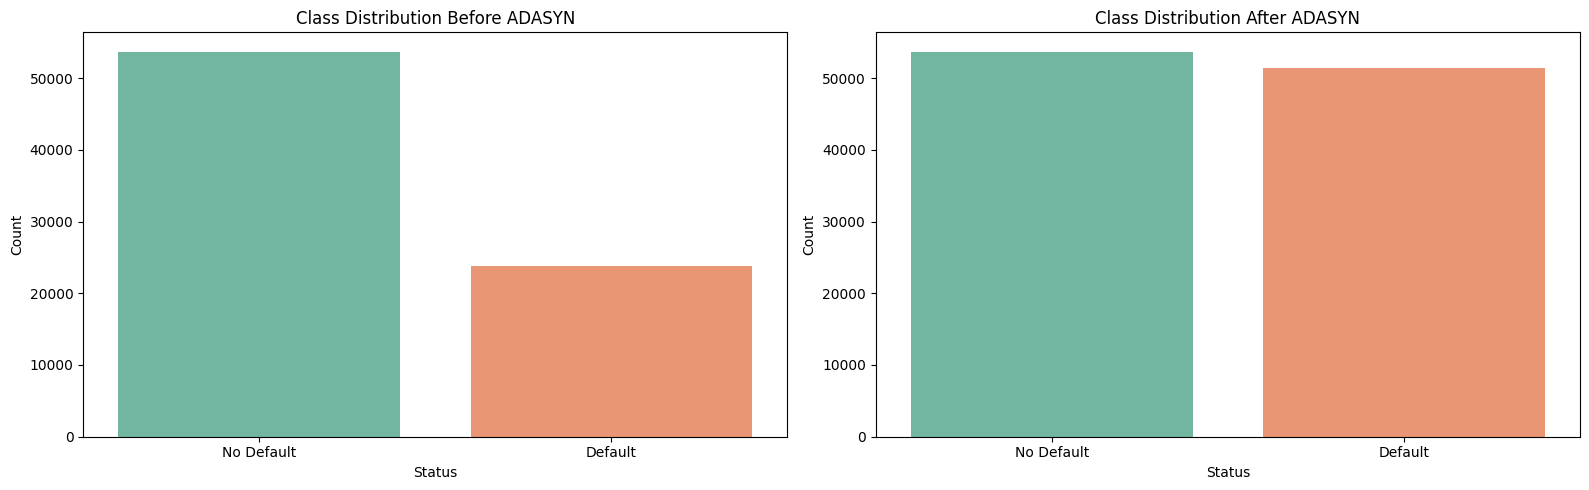

Before  After
Status               
0        53693  53693
1        23839  51450

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN

# Creating subplots for class distribution before and after ADASYN
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting class distribution before ADASYN
sns.countplot(x='Status', data=scaled_data_with_target, palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution Before ADASYN')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Default', 'Default'])

# Applying ADASYN to balance the classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled_df, y_train)

# Plotting class distribution after ADASYN
sns.countplot(x=y_resampled, palette='Set2', ax=axes[1])
axes[1].set_title('Class Distribution After ADASYN')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

# Creating a DataFrame to compare before and after
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_resampled).value_counts()

# Creating a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Before': before_count,
    'After': after_count
})

comparison_df

[2024-11-22 00:10:40,903: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-11-22 00:10:40,983: 223 matplotlib.category: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


<Axes: xlabel='Status', ylabel='count'>

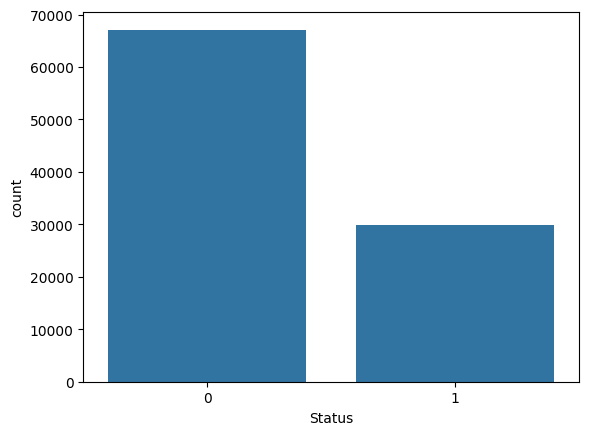

In [84]:
sns.countplot(loan_df, x='Status')

In [85]:
X_resampled.sample(10)

ID  year    Gender  loan_purpose  loan_amount      term  \
90679  1.428761   0.0 -1.842241     -0.425613     0.414793  0.423221   
75886  0.899550   0.0  0.230830      0.721036     0.069830  0.423221   
27760 -0.230824   0.0  1.061545      0.721036     0.416635  0.423221   
18309 -1.187001   0.0 -0.041901      0.320875    -0.485058 -1.681106   
74172  1.423961   0.0 -0.041901      0.721036    -0.693141  0.423221   
65946  0.204414   0.0  1.061545      0.721036    -0.762502 -0.628942   
26802  0.794201   0.0 -1.842241     -1.416563    -0.207614  0.423221   
91999 -1.484719   0.0 -0.041901      0.320875    -0.881929  0.423221   
27457 -0.476086   0.0  0.230830      0.721036     1.803854  0.423221   
73033 -0.974929   0.0  1.061545      0.721036     0.555357  0.423221   

       total_units  credit_type  Credit_Score       age    Region  \
90679     0.096681     0.530090     -0.676813 -0.853760  0.196463   
75886     0.096681     0.312155      0.594244  0.774453  0.578288   
27760     0.096681     0.312155     -0.371439  0.431698 -0.133517   
18309     0.096681     0.312155      1.206418  0.702856 -0.133517   
74172     0.096681     0.000506      0.939131  0.702856 -0.133517   
65946     0.096681     0.718433     -1.069835 -0.963442  0.578288   
26802     0.096681     0.000506     -1.009480  0.774453  0.578288   
91999     0.096681     0.312155      1.581956 -2.735866 -0.133517   
27457     0.096681     0.312155     -1.699254 -0.853760 -0.133517   
73033     0.096681     0.312155      1.715127  0.774453  0.578288   

       Security_Type    income     dtir1  property_value  rate_of_interest  \
90679      -0.018665 -0.611843  0.571564       -0.015993          0.218282   
75886      -0.018665  0.466948 -1.049574       -0.152464          0.657698   
27760      -0.018665  0.361500 -0.072145        0.534463         -0.746873   
18309      -0.018665  0.129513 -0.615161       -0.099624         -0.746873   
74172      -0.018665 -1.262408  1.122491       -0.258145          0.037073   
65946      -0.018665 -0.503178  0.579475       -0.892232          1.702961   
26802      -0.018665 -0.482089  0.253665       -0.786551          0.478044   
91999      -0.018665 -1.279886  2.280873       -0.278724          0.218282   
27457      -0.018665  0.298231  0.036458        1.802637         -0.942860   
73033      -0.018665  0.741114 -0.289351        0.904347         -1.563485   

       Interest_rate_spread  Upfront_charges       LTV  loan_limit_cf  \
90679              0.132259        -0.029807  0.668582       0.229117   
75886             -1.679490        -1.421262  0.297594       0.229117   
27760             -0.461982         0.213253 -0.231858       0.229117   
18309              1.339196         0.833742 -0.831355       0.229117   
74172             -1.040451        -0.029807 -1.006066       0.229117   
65946              0.201224         0.085976  0.121639       0.229117   
26802              2.080102         2.062132  1.341750       0.229117   
91999              0.132259        -0.029807 -1.343486       0.229117   
27457             -1.304448        -1.421262 -0.004039       0.229117   
73033             -1.405703        -1.421262 -0.482230       0.229117   

       loan_limit_ncf  approv_in_adv_nopre  approv_in_adv_pre  \
90679       -0.229117             0.438965          -0.438965   
75886       -0.229117             0.438965          -0.438965   
27760       -0.229117             0.438965          -0.438965   
18309       -0.229117             0.438965          -0.438965   
74172       -0.229117             0.438965          -0.438965   
65946       -0.229117             0.438965          -0.438965   
26802       -0.229117             0.438965          -0.438965   
91999       -0.229117             0.438965          -0.438965   
27457       -0.229117             0.438965          -0.438965   
73033       -0.229117             0.438965          -0.438965   

       loan_type_type1  loan_type_type2  loan_type_type3  \
90679         0.57212

In [86]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105143 entries, 0 to 105142
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     105143 non-null  float64
 1   year                                   105143 non-null  float64
 2   Gender                                 105143 non-null  float64
 3   loan_purpose                           105143 non-null  float64
 4   loan_amount                            105143 non-null  float64
 5   term                                   105143 non-null  float64
 6   total_units                            105143 non-null  float64
 7   credit_type                            105143 non-null  float64
 8   Credit_Score                           105143 non-null  float64
 9   age                                    105143 non-null  float64
 10  Region                                 105143 non-null  

In [87]:
X_test_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19383 entries, 5508 to 85907
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     19383 non-null  float64
 1   year                                   19383 non-null  float64
 2   Gender                                 19383 non-null  float64
 3   loan_purpose                           19383 non-null  float64
 4   loan_amount                            19383 non-null  float64
 5   term                                   19383 non-null  float64
 6   total_units                            19383 non-null  float64
 7   credit_type                            19383 non-null  float64
 8   Credit_Score                           19383 non-null  float64
 9   age                                    19383 non-null  float64
 10  Region                                 19383 non-null  float64
 11  Secu

# Feature Selection

In [88]:
from mlproject.utils.common import plot_corr_matrix_num_features

loan_df['Status'] = loan_df['Status'].astype('int')
numeric_columns1 = loan_df.select_dtypes(['int', 'float']).columns
plot_corr_matrix_num_features(loan_df, numeric_columns1)

**Analysis**:
Following are independent features which are highly correlated, one should be dropped:

2. Loan amount and property value
3. Loan amount and income


In [89]:
loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status',
       'income', 'dtir1', 'property_value', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'LTV', 'Status_str'],
      dtype='object')

In [90]:

loan = loan_df.drop(['Status_str', 'ID', 'year'], axis=1)
loan['Status'] = loan['Status'].astype('int')
loan.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application',
       'Region', 'Security_Type', 'Status', 'income', 'dtir1',
       'property_value', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'LTV'],
      dtype='object')

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_classifier = ExtraTreesClassifier()

extra_tree_classifier.fit(X_resampled, y_resampled)

ExtraTreesClassifier()

In [92]:
ranked_features = pd.Series(extra_tree_classifier.feature_importances_, index=X_resampled.columns)

# Create DataFrame from ranked_features
ranked_features_df = pd.DataFrame({
    "Feature": ranked_features.index,
    "Importance": ranked_features.values
})

# Reset index to make it cleaner
ranked_features_df.reset_index(drop=True, inplace=True)

ranked_features_df.sort_values(by='Importance', ascending=False)

Feature  Importance
15                       rate_of_interest    0.305553
17                        Upfront_charges    0.300966
16                   Interest_rate_spread    0.231820
7                             credit_type    0.051543
47     submission_of_application_not_inst    0.009400
48      submission_of_application_to_inst    0.008377
13                                  dtir1    0.006764
12                                 income    0.006244
14                         property_value    0.005575
18                                    LTV    0.004836
32              Neg_ammortization_neg_amm    0.004728
3                            loan_purpose    0.004495
33              Neg_ammortization_not_neg    0.004077
36                  lump_sum_payment_lpsm    0.004055
37              lump_sum_payment_not_lpsm    0.003937
10                                 Region    0.003704
4                             loan_amount    0.003356
9                                     age    0.003162
41     occupancy_type_Primary Residential    0.002952
5                                    term    0.002938
23                        loan_type_type1    0.002767
0                                      ID    0.002511
8                            Credit_Score    0.002426
30             business_or_commercial_b/c    0.002393
2                                  Gender    0.002251
45           co-applicant_credit_type_CIB    0.001731
40  occupancy_type_Investment Residential    0.001684
24                        loan_type_type2    0.001652
46           co-applicant_credit_type_EXP    0.001600
25                        loan_type_type3    0.001442
31           business_or_commercial_nob/c    0.001367
6                             total_units    0.001329
22                      approv_in_adv_pre    0.001294
21                    approv_in_adv_nopre    0.001241
26                   Credit_Worthiness_l1    0.001076
27                   Credit_Worthiness_l2    0.000996
34                 interest_only_int_only    0.000890
19                          loan_limit_cf    0.000853
20                         loan_limit_ncf    0.000852
35                  interest_only_not_int    0.000804
42  occupancy_type_Secondary Residdential    0.000331
29                        open_credit_opc    0.000007
28                       open_credit_nopc    0.000006
39                   construction_type_sb    0.000004
43                        Secured_by_home    0.000004
38                   construction_type_mh    0.000003
44                        Secured_by_land    0.000003
11                          Security_Type    0.000002
1                                    year    0.000000

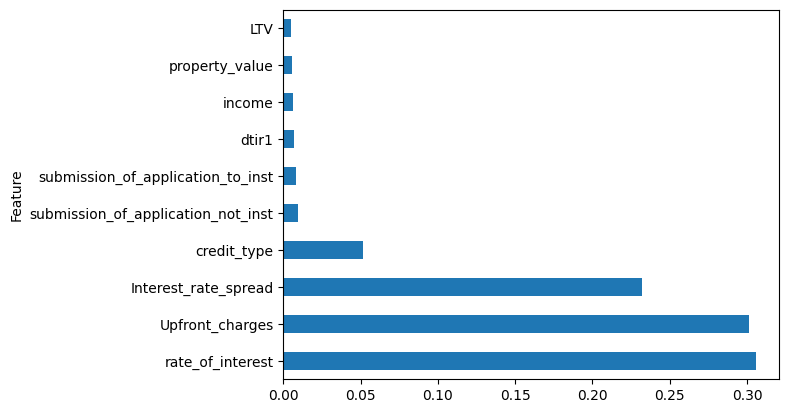

In [93]:
top_features = ranked_features_df.nlargest(10, columns='Importance').set_index('Feature')

top_features.plot(kind='barh', legend=False)
plt.show()

# Dropped here

In [94]:
X_resampled.columns

Index(['ID', 'year', 'Gender', 'loan_purpose', 'loan_amount', 'term',
       'total_units', 'credit_type', 'Credit_Score', 'age', 'Region',
       'Security_Type', 'income', 'dtir1', 'property_value',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'LTV',
       'loan_limit_cf', 'loan_limit_ncf', 'approv_in_adv_nopre',
       'approv_in_adv_pre', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_Investment Residential',
       'occupancy_type_Primary Residential',
       'occupancy_type_Secondary Residdential', 'Secured_by_home',
       'Se

In [95]:
columns_to_drop03 = [
       'ID', 'year', 'term', 'loan_limit_cf', 'loan_limit_ncf','Interest_rate_spread',
       'property_value','submission_of_application_not_inst',
       'submission_of_application_to_inst', 'construction_type_mh',
       'construction_type_sb', 'open_credit_nopc', 'open_credit_opc'
       ]

X_resampled.drop(columns_to_drop03, axis=1, inplace=True)
X_test.drop(columns_to_drop03, axis=1, inplace=True)


In [96]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105143 entries, 0 to 105142
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 105143 non-null  float64
 1   loan_purpose                           105143 non-null  float64
 2   loan_amount                            105143 non-null  float64
 3   total_units                            105143 non-null  float64
 4   credit_type                            105143 non-null  float64
 5   Credit_Score                           105143 non-null  float64
 6   age                                    105143 non-null  float64
 7   Region                                 105143 non-null  float64
 8   Security_Type                          105143 non-null  float64
 9   income                                 105143 non-null  float64
 10  dtir1                                  105143 non-null  

In [97]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19383 entries, 5508 to 85907
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 19383 non-null  int64  
 1   loan_purpose                           19383 non-null  int64  
 2   loan_amount                            19383 non-null  int64  
 3   total_units                            19383 non-null  int64  
 4   credit_type                            19383 non-null  int64  
 5   Credit_Score                           19383 non-null  int64  
 6   age                                    19383 non-null  int64  
 7   Region                                 19383 non-null  int64  
 8   Security_Type                          19383 non-null  float64
 9   income                                 19383 non-null  float64
 10  dtir1                                  19383 non-null  float64
 11  rate

In [98]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 105143 entries, 0 to 105142
Series name: Status
Non-Null Count   Dtype
--------------   -----
105143 non-null  int64
dtypes: int64(1)
memory usage: 821.6 KB


# Model Training

In [99]:
# model.fit(X_resampled, y_resampled)

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))


# Encodings
Whether to use **frequency encoding** or **target encoding** for columns with more than 3 unique values depends on your dataset, the relationship between the features and the target, and the machine learning model you are using.

---

### Summary Table for Decision:

| **Criterion**                        | **Frequency Encoding**                           | **Target Encoding**                             |
|--------------------------------------|-------------------------------------------------|------------------------------------------------|
| Relationship with Target             | Weak or No Relationship                         | Strong Relationship                             |
| Risk of Target Leakage               | None                                            | High (if not applied carefully)                |
| Suitable for Models                  | Tree-based models                               | Linear models, Tree-based (with care)          |
| Handling High Cardinality            | Efficient                                       | Can lead to overfitting without regularization |
| Data Imbalance                       | Works well                                      | May need smoothing to handle imbalanced data   |

---

### Recommendation for Your Dataset:
For columns with **>3 unique values**:
1. **Use Frequency Encoding**:  
   - For features where the relationship with the target is weak or unclear. This is simpler, faster, and avoids target leakage.
   
2. **Use Target Encoding**:  
   - For features like `Security_Type`, where a strong relationship with the target is observed. Implement it carefully using regularization or cross-validation to avoid overfitting.

For columns with **2-3 unique values**:
1. **Use OneHot Encoding**

---